In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import cv2.aruco as aruco
from PIL import Image

In [2]:
camera_matrix = np.array([[635.93, 0.0, 444.27], [0.0, 634.263, 256.835],[0.0, 0.0, 1.0]])
distortion_coefficient =  np.array([-0.372403, 0.157163, -0.00424357, -0.00231644, -0.0522724])

In [3]:
cap = cv2.VideoCapture(0)

def getImages(camera_matrix,distortion_coefficient, cap, amount):
    corners_list = [0]*amount
    ids_list = [0]*amount
    rejected_img_points_list = [0]*amount
    frame_list = [0]*amount

    

    for i in range(0,amount):
        ret, frame = cap.read()
        # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  

        aruco_dict = aruco.Dictionary_get(cv2.aruco.DICT_ARUCO_ORIGINAL)  
        parameters = aruco.DetectorParameters_create()  
        corners, ids, rejected_img_points = aruco.detectMarkers(frame, aruco_dict, parameters=parameters)   
        corners_list[i] = corners
        ids_list[i] = ids
        rejected_img_points_list[i] = rejected_img_points
        
        for j in range(0, len(ids)): 
            rvec, tvec, _ = aruco.estimatePoseSingleMarkers(corners[j], 0.02, camera_matrix, distortion_coefficient)
            (rvec - tvec).any()
            aruco.drawDetectedMarkers(frame, corners)
            cv2.drawFrameAxes(frame, camera_matrix, distortion_coefficient, rvec, tvec, 0.01)

        frame = Image.fromarray(frame)
        frame_list[i] = frame

    return corners_list, ids_list, rejected_img_points_list, frame_list

In [6]:
def detectArucaMarkers(img):
    camera_matrix = np.array([[635.93, 0.0, 444.27], [0.0, 634.263, 256.835],[0.0, 0.0, 1.0]])
    distortion_coefficient =  np.array([-0.372403, 0.157163, -0.00424357, -0.00231644, -0.0522724])

    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    aruco_dict = aruco.Dictionary_get(cv2.aruco.DICT_ARUCO_ORIGINAL)        
    parameters = aruco.DetectorParameters_create()  
    corners, ids, rejected_img_points = aruco.detectMarkers(img, aruco_dict, parameters=parameters)

    for j in range(0, len(ids)):
        rvec, tvec, _ = aruco.estimatePoseSingleMarkers(corners[j], 0.02, camera_matrix, distortion_coefficient)
        (rvec - tvec).any()
        aruco.drawDetectedMarkers(img, corners)
        cv2.drawFrameAxes(img, camera_matrix, distortion_coefficient, rvec, tvec, 0.01)

    return img


In [8]:
# corners, ids, rejected_img_points, frames = getImages(camera_matrix,distortion_coefficient, cap, 2)
cap.release()
cv2.destroyAllWindows()


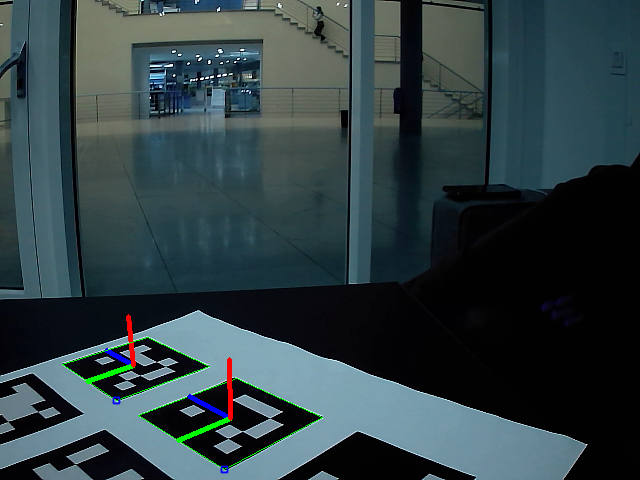

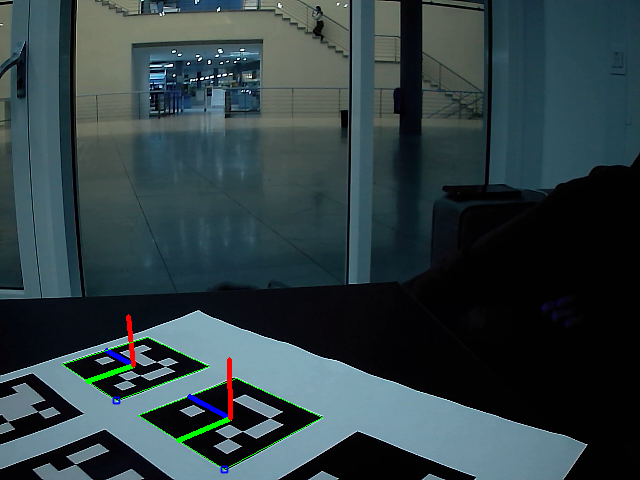

In [84]:
for frame in frames:
    frame.rotate(180).show()